# EDA


Queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

In [1]:
import numpy as np
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

df = pd.read_csv(url)

df.to_csv('../data/raw/data.csv')

In [3]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6313,4.4653,33.0,5.872910,1.056856,1971.0,3.295987,34.02,-117.98,1.932
11666,3.8864,29.0,5.160000,1.117500,1265.0,3.162500,33.85,-118.01,2.093
11090,5.0605,24.0,5.660714,0.937500,700.0,3.125000,33.82,-117.89,2.162
12724,4.7750,36.0,6.707865,1.036517,838.0,2.353933,38.59,-121.37,1.941
20155,5.7500,16.0,6.300000,1.170000,343.0,3.430000,34.42,-119.23,3.250


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Dropeo las columnas que no van a ser necesarias para mi estudio

In [5]:
# Latitude, Longitude y MedInc

df.drop(['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal'], axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

Clasifico mis datos en 6 clusters, usando el modelo K-Means

In [7]:
from sklearn.cluster import KMeans

# Inicializo mi modelo
k_model = KMeans(n_clusters = 6, random_state=42)

# Creo mi columna cluster, asigno las etiquetas directamente con el fit_predict
X_train['cluster'] = k_model.fit_predict(X_train)

# Creo las etiquetas y mi columna cluster para mis nuevos datos
X_test['cluster'] = k_model.predict(X_test)

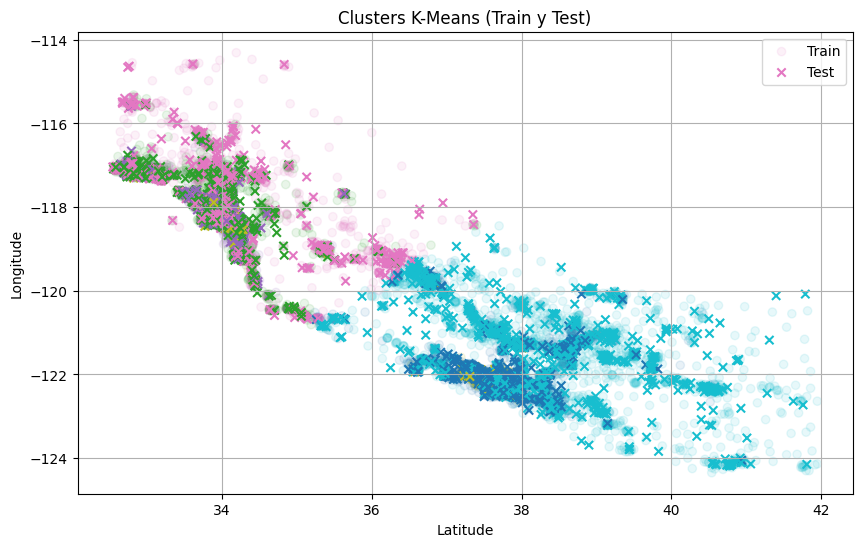

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


# Graficar puntos de entrenamiento
plt.scatter(X_train['Latitude'], X_train['Longitude'],
            c=X_train['cluster'], cmap='tab10', alpha=0.1, label='Train')

# Graficar puntos de test
plt.scatter(X_test['Latitude'], X_test['Longitude'],
            c=X_test['cluster'], cmap='tab10', marker='x', label='Test')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clusters K-Means (Train y Test)')
plt.legend()
plt.grid(True)
plt.show()

## Hyerarchical Clustering

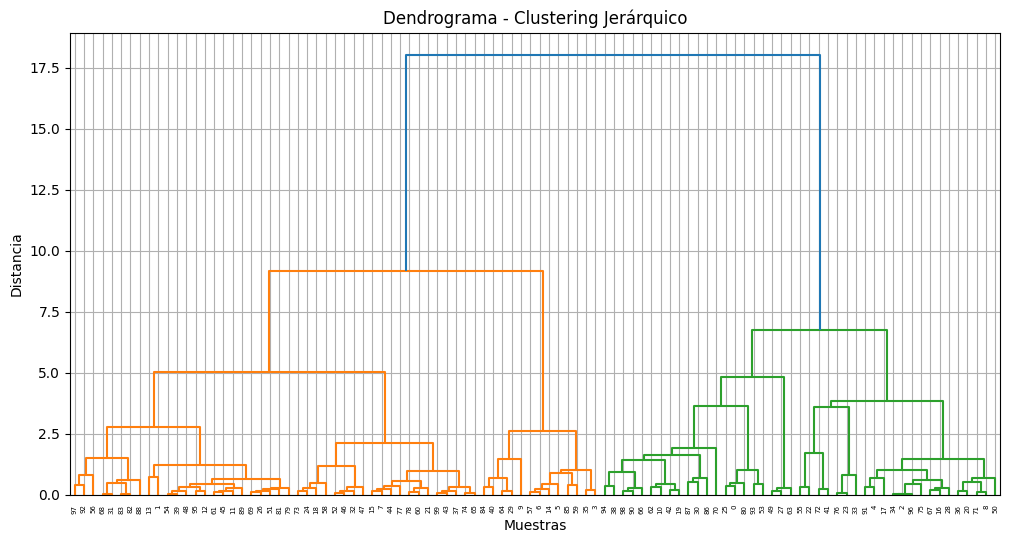

In [9]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Seleccionar un subconjunto de datos (opcional si tu dataset es muy grande)
subset_df = df[['Latitude', 'Longitude', 'MedInc']].sample(n=100, random_state=42)

# Escalar los datos (recomendado para clustering jerárquico)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

# Crear la estructura jerárquica
linked = linkage(scaled_data, method='ward')
                 
# Imprimir el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.grid(True)
plt.show()

## Entrenamiento modelo supervisado

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Separo y limpio mis datos para que no haya contaminacion con mi target

In [12]:
y_train = X_train['cluster']
X_train.drop(columns='cluster', inplace=True, axis=1)

y_test = X_test['cluster']
X_test.drop(columns='cluster', inplace=True, axis=1)

In [28]:
log_model = LogisticRegression(random_state=42)

tree_model = DecisionTreeClassifier(random_state=42)

forest_model = RandomForestClassifier(random_state=42)

nearest_model = KNeighborsClassifier(n_neighbors=5)

### Logistic Regression Model

In [18]:
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

accuracy_score(y_test, y_pred_log)

c:\Users\Carlos\anaconda3\envs\geeks\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9665697674418605

### Decision Tree Model

In [26]:
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

accuracy_score(y_test, y_pred_tree)

0.9951550387596899

### K Nearest model

In [25]:
nearest_model.fit(X_train, y_train)

y_pred_nearest = nearest_model.predict(X_test)

accuracy_score(y_test, y_pred_nearest)

0.9920058139534884

### Random Forest Model

In [20]:
forest_model.fit(X_train, y_train)

y_pred_forest = forest_model.predict(X_test)

accuracy_score(y_test, y_pred_forest)

0.9963662790697675

El modelo que me da mejores resultandos sin llevar a cabo una optimizacion es el Random Forest, por lo tanto es el que usare.